# import

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
df=pd.read_csv('/content/drive/MyDrive/DM_Lab/titanic_train.csv')
df.head(5)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


# Task 1

In [32]:
df['Age Group'] = pd.cut(df['age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
print(df[['age', 'Age Group']])

      age    Age Group
0     NaN          NaN
1    38.0        Adult
2    30.0  Young Adult
3    54.0        Adult
4    40.0        Adult
..    ...          ...
845  55.0        Adult
846  58.0        Adult
847  24.0  Young Adult
848   3.0        Child
849  52.0        Adult

[850 rows x 2 columns]


In [16]:
print("\nAge Group Distribution:")
print(df['Age Group'].value_counts())


Age Group Distribution:
Age Group
Young Adult    343
Adult          177
Child          136
Senior          20
Name: count, dtype: int64


# Task 2: Z-Score

In [19]:
mean = df['age'].mean()
std = df['age'].std()

df['Z-Score_Age'] = (df['age'] - mean) / std

In [20]:
df['Z-Score_Age'].head(10)

,Z-Score_Age
0,2.736112e-16
1,6.530965e-01
2,3.697883e-02
3,1.885332e+00
4,8.071259e-01
5,-1.170506e-01
6,-8.101830e-01
7,3.697883e-02
8,-5.791388e-01
9,-6.561535e-01


In [34]:
data = {
    'ID': list(range(1, 51)),
    'Exam Score': np.random.randint(50, 100, size=50).tolist()
}

df1 = pd.DataFrame(data)
df1.to_csv('exam_data.csv', index=False)
df1 = pd.read_csv('exam_data.csv')

df1.head(10)

,ID,Exam Score
0,1,93
1,2,75
2,3,93
3,4,61
4,5,50
5,6,90
6,7,62
7,8,76
8,9,78
9,10,79


In [35]:
mean = df1['Exam Score'].mean()
std = df1['Exam Score'].std()

df1['Z-Score'] = (df1['Exam Score'] - mean) / std
print(df1)

    ID  Exam Score   Z-Score
0    1          93  0.984537
1    2          75 -0.190640
2    3          93  0.984537
3    4          61 -1.104666
4    5          50 -1.822830
5    6          90  0.788674
6    7          62 -1.039379
7    8          76 -0.125352
8    9          78  0.005223
9   10          79  0.070511
10  11          95  1.115112
11  12          54 -1.561679
12  13          65 -0.843516
13  14          97  1.245687
14  15          93  0.984537
15  16          54 -1.561679
16  17          51 -1.757542
17  18          98  1.310975
18  19          94  1.049825
19  20          83  0.331661
20  21          89  0.723387
21  22          98  1.310975
22  23          81  0.201086
23  24          59 -1.235241
24  25          96  1.180400
25  26          65 -0.843516
26  27          66 -0.778228
27  28          52 -1.692255
28  29          87  0.592811
29  30          88  0.658099
30  31          89  0.723387
31  32          90  0.788674
32  33          78  0.005223
33  34        

# Task 3:

In [41]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = {
    'ID': list(range(1, 51)),
    'Color': np.random.choice(['Red', 'Blue', 'Green', 'Yellow'], size=50).tolist()
}
df2 = pd.DataFrame(data)
df2.to_csv('categorical_data.csv', index=False)

df2 = pd.read_csv('categorical_data.csv')

In [42]:
label_encoder = LabelEncoder()
df2['Color_Label'] = label_encoder.fit_transform(df2['Color'])

print("Label Encoded DataFrame:")
print(df2)

Label Encoded DataFrame:
    ID   Color  Color_Label
0    1    Blue            0
1    2     Red            2
2    3     Red            2
3    4    Blue            0
4    5     Red            2
5    6    Blue            0
6    7     Red            2
7    8   Green            1
8    9    Blue            0
9   10  Yellow            3
10  11    Blue            0
11  12    Blue            0
12  13   Green            1
13  14   Green            1
14  15  Yellow            3
15  16  Yellow            3
16  17    Blue            0
17  18    Blue            0
18  19    Blue            0
19  20     Red            2
20  21  Yellow            3
21  22     Red            2
22  23    Blue            0
23  24   Green            1
24  25   Green            1
25  26  Yellow            3
26  27    Blue            0
27  28  Yellow            3
28  29     Red            2
29  30  Yellow            3
30  31     Red            2
31  32  Yellow            3
32  33     Red            2
33  34     Red         

In [43]:
df_onehot = pd.get_dummies(df2, columns=['Color'], prefix='Color')

print("\nOne-Hot Encoded DataFrame:")
print(df_onehot)


One-Hot Encoded DataFrame:
    ID  Color_Label  Color_Blue  Color_Green  Color_Red  Color_Yellow
0    1            0        True        False      False         False
1    2            2       False        False       True         False
2    3            2       False        False       True         False
3    4            0        True        False      False         False
4    5            2       False        False       True         False
5    6            0        True        False      False         False
6    7            2       False        False       True         False
7    8            1       False         True      False         False
8    9            0        True        False      False         False
9   10            3       False        False      False          True
10  11            0        True        False      False         False
11  12            0        True        False      False         False
12  13            1       False         True      False       

# Task 4

In [51]:
df3 = pd.read_csv('/content/drive/MyDrive/DM_Lab/Salary Data.csv')
df3.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [52]:
df3.isnull().sum()

,0
Age,2
Gender,2
Education Level,2
Job Title,2
Years of Experience,2
Salary,2


In [57]:
df3.fillna({'Age': df3['Age'].mean(),
            'Salary': df3['Salary'].median(),
            'Gender': df3['Gender'].mode()[0]}, inplace=True)

df3.dropna(inplace=True)

In [58]:
print("\nCleaned Dataset:\n")
df3.head(10)
df3.isnull().sum()


Cleaned Dataset:



,0
Age,0
Gender,0
Education Level,0
Job Title,0
Years of Experience,0
Salary,0


# Task 5:

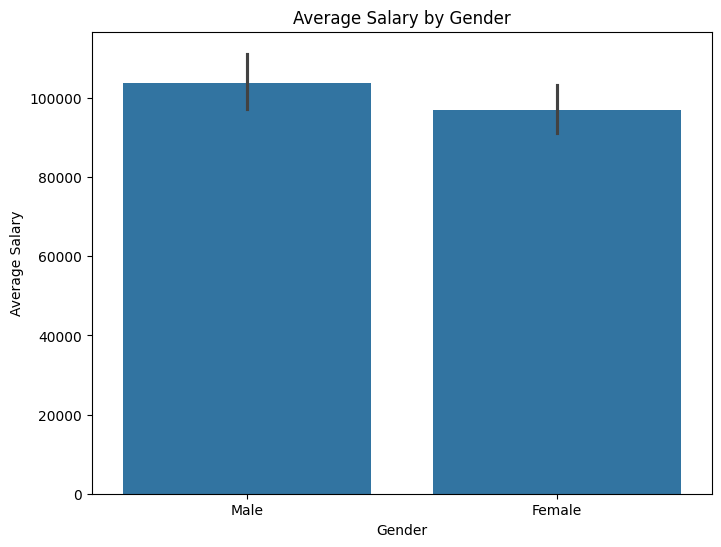

In [59]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Salary', data=df3, estimator='mean')
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

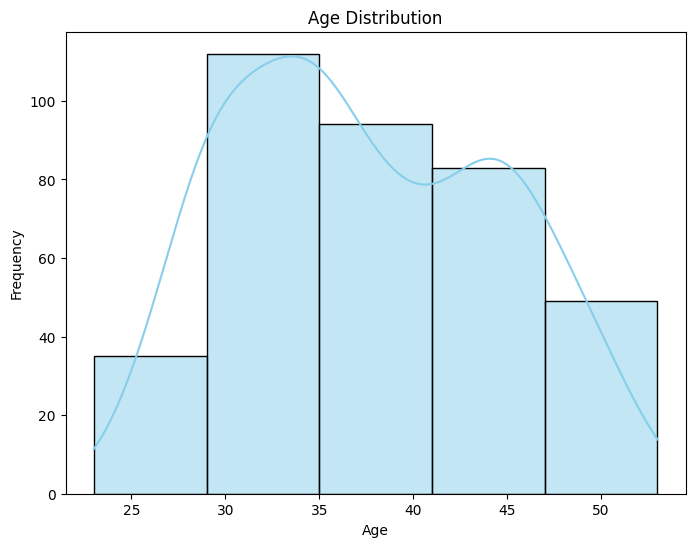

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df3['Age'], bins=5, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

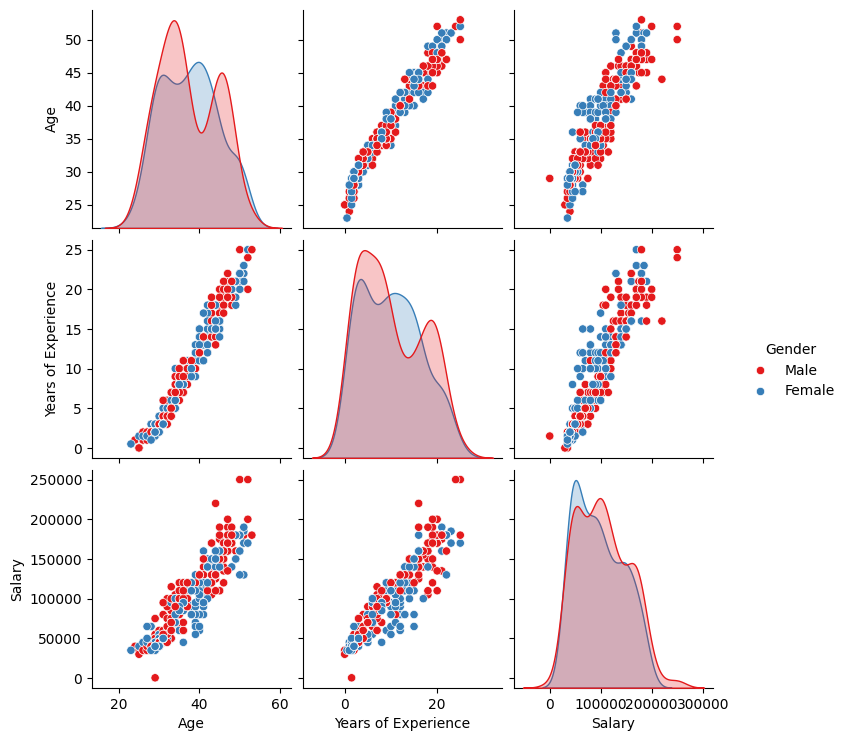

In [61]:
sns.pairplot(df3, vars=['Age', 'Years of Experience', 'Salary'], hue='Gender', palette='Set1')
plt.show()